##### Instead of using histogram, I think bar chart is more appropriate to solve the problems and plot the result, because each digit from 1 to 9 represents one category other than continuous variables. Also, it is much clearer to analyze the data from three models within one chart than checking three charts.

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

df = pd.read_excel("online_retail_2010_2011.xlsx")

# clean data: remove all items with price below 1
df_clean = df.loc[(df["Price"] >= 1)].copy()
df_clean["Price_Int"] = df_clean["Price"].astype(str)
df_clean["Price_Int"] = df_clean["Price_Int"].str.slice(stop = 1)
df_clean.head()

## 1. Plot the frequencies for real distribution, equal-weight and Bernford (for each digit)

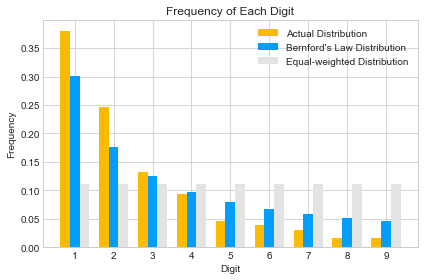

In [2]:
digit = [d for d in range(1,10)]

# Real distribution based on the data
digit_distribution = df_clean["Price_Int"].value_counts(normalize=True)

# Bernford's Law
bernford_law_distribution = [math.log10(1 + 1/d) for d in digit]

# Equal-weighted distribution for each digit
equal_weight_distribution = [1/9 for i in range(1,10)]

# plot histogram
real_color = "#fcba03"
bnf_color = "#039dfc"
eql_color = "#e3e3e3"
width = 0.25
x_index = np.arange(len(digit))

plt.style.use("seaborn-whitegrid")
plt.bar(x_index - width, digit_distribution, width, color=real_color, label="Actual Distribution")
plt.bar(x_index, bernford_law_distribution, width, color=bnf_color, label="Bernford's Law Distribution")
plt.bar(x_index + width, equal_weight_distribution, width, color=eql_color, label="Equal-weighted Distribution")
plt.xticks(ticks=x_index, labels=digit)
plt.title("Frequency of Each Digit")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()

plt.show()

#### From the chart, the trendings of digit frequency between real distribution and the Bernford's Law distribution are simliar: the frequency goes down as the digit goes bigger. 

## 2. Plot  the relative errors for Models 1 and 2 (for each digit)


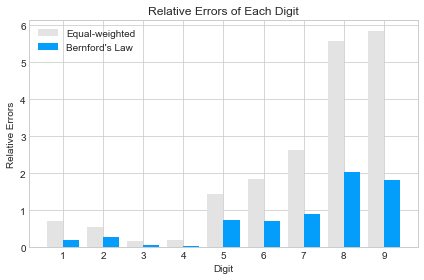

In [3]:
# Actual frequency of each digit
actual_digit_arr = np.array(digit_distribution)

# Model 1 equal-weight distribution
eql_arr = np.array(equal_weight_distribution)
model_one_error = np.absolute((eql_arr - actual_digit_arr) / actual_digit_arr)

# Model 2 Bernford's law
bfl_arr = np.array(bernford_law_distribution)
model_two_error = np.absolute((bfl_arr - actual_digit_arr) / actual_digit_arr)

# plot histogram
width2 = 0.4
plt.bar(x_index - width2 / 2, model_one_error, width2, color=eql_color, label="Equal-weighted")
plt.bar(x_index + width2 / 2, model_two_error, width2, color=bnf_color, label="Bernford's Law")
plt.xticks(ticks=x_index, labels=digit)
plt.title("Relative Errors of Each Digit")
plt.xlabel("Digit")
plt.ylabel("Relative Errors")
plt.legend()
plt.tight_layout()

plt.show()

#### From the chart, the relative errors of each digit compared between 2 models are dramatically different from digit 5 to 9. For each digit, the relative errors under the Model 1 equal-weighted distribution are always higher than the one under Model 2 Bernford's Law. In both models, the relative errors for digit 5 to 9 are larger than for digit 1 to 4, but they increased even more significantly under Model 1.

## 3. Compute RMSE (root mean squared error) for model 1, 2. Whick model is closer to the real distribution?

In [4]:
def rmse(actual_f, predict_p):
    squared_error = (actual_f - predict_p) ** 2
    rmse = (np.sum(squared_error) / len(squared_error)) ** 0.5
    return round(rmse,3)

# Model 1 equal-weight distribution
m1_rmse = rmse(actual_digit_arr, eql_arr)
print("RMSE for model one is", m1_rmse)

# Model 2 Bernford's law
m2_rmse = rmse(actual_digit_arr, bfl_arr)
print("RMSE for model two is", m2_rmse)

RMSE for model one is 0.118
RMSE for model two is 0.042


#### Based on the rule that lower values of RMSE indicate better fit, RMSE for model 2 is lower than model 1. Therefore, the model 2 is closer to the real distribution. 

## 4. Take 3 countires of your choice: one from Asia, one from Europe and one from the Middle East. For each of these countries do the following:
### (a) compute F, P and PI
### (b) using RMSE as a "distance" metric, for which of these chosen three countries is the distribution "closest" toequal weight P?

In [7]:
# Choose each of one country from Asia, Europe, and Middle East
countries = ["Japan", "Italy", "Israel"]
df_countries = df_clean[df_clean["Country"].isin(countries)]

# Equal weight
model1_p = eql_arr

# Berndord's Law
model2_pi = bfl_arr

# Actual 
crosstab_actual = pd.crosstab(index=df_countries["Country"], columns=df_countries["Price_Int"], normalize=True)
crosstab_actual.style.format("{:.3f}")

Price_Int,1,2,3,4,5,6,7,8,9
Country,,,,,,,,,
Israel,0.079,0.033,0.022,0.028,0.004,0.005,0.007,0.008,0.003
Italy,0.212,0.161,0.035,0.087,0.015,0.013,0.019,0.037,0.013
Japan,0.095,0.059,0.031,0.021,0.003,0.003,0.002,0.003,0.001


#### The actual frequencies for each digit among three countries are shown as above. As for the predicted P for equal-weighted distribution and Pi for berndord's law, they remain the same as before.

In [8]:
# Calculate the RMSE between actual frequency and predicted equal-weighted frequency P
isr_rmse = rmse(crosstab_actual.loc["Israel"], model1_p)
itl_rmse = rmse(crosstab_actual.loc["Italy"], model1_p)
jpn_rmse = rmse(crosstab_actual.loc["Japan"], model1_p)
print(f"RMSE for Israel is {isr_rmse},\
    RMSE for Italy is {itl_rmse},\
    RMSE for Japan is {jpn_rmse}.")

RMSE for Israel is 0.093,    RMSE for Italy is 0.083,    RMSE for Japan is 0.092.


#### RMSE for Italy is the smallest among three countries, so it is closest to equal weight P.